In [49]:
# remove cached Python file (if exists)
!rm -r las_converter/__pycache__/

rm: cannot remove 'las_converter/__pycache__/': No such file or directory


In [50]:
# checking Python environment existence
!./check-pyenv.sh

-e $'env' already exists.
 $actvate the setup by $source env/bin/activate $

install Python dependencies then by
 $pip install -r requirements.txt


In [51]:
# import several libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# import external libraries
from las_converter import WellLog

In [52]:
# init'd well instance
log1 = WellLog("samples/WA2.LAS")

Getiing LAS file from local drive...
Loading well data. It will takes time for a while...
Well log data loaded for 11.379339 s


In [53]:
# get well description section
log1.get_description()

There are some well properties with description provided.
- version
- well
- curve
- parameter
- other
- data_table


In [54]:
# get version description
log1.get_description("version")

Describing well log information about 'version'
- vers. : CWLS LOG ASCII STANDARD--VERSION 2.0
- wrap. : ONE LINE PER DEPTH STEP


In [55]:
# get well description
log1.get_description("well")

Describing well log information about 'well'
- strt.ft : START DEPTH
- stop.ft : STOP DEPTH
- step.ft : STEP
- null. : NULL VALUE
- comp. : COMPANY
- well. : WELL NAME
- uwi. : WELL UWI
- api. : WELL API
- loc. : WELL LOCATION
- date. : WELL DATE
- fld. : Project NAME


In [56]:
# get curve description
log1.get_description("curve")

Describing well log information about 'curve'
- m__depth.ft : M__DEPTH
- sp : SP
- gr : GR
- cali : CALI
- bitsize : BitSize
- msfl : MSFL
- lld : LLD
- lls : LLS
- rhob : RHOB
- nphi : NPHI
- dt : DT
- mudwgt : MudWgt


In [57]:
# get well data information
log1.get_data("well")

Getting information: well
- strt.ft : 98.00000
- stop.ft : 4360.00000
- step.ft : 0.50000
- null. : -999.00000
- comp. : Data output from TerraStation II
- well. : Walakpa 2
- uwi. : 50-023-20019
- api. : 50-023-20019
- loc. : 31 20N 19W
- date. : NorthSlope.W07
- fld. : No Project Selected


In [58]:
# accessing well log data table
log_data = log1.info["data_table"]

print(log_data["m__depth.ft"])
print(log_data["gr"][:10])

[  98.    98.5   99.  ... 4359.  4359.5 4360. ]
[None None None None None None None None None None]


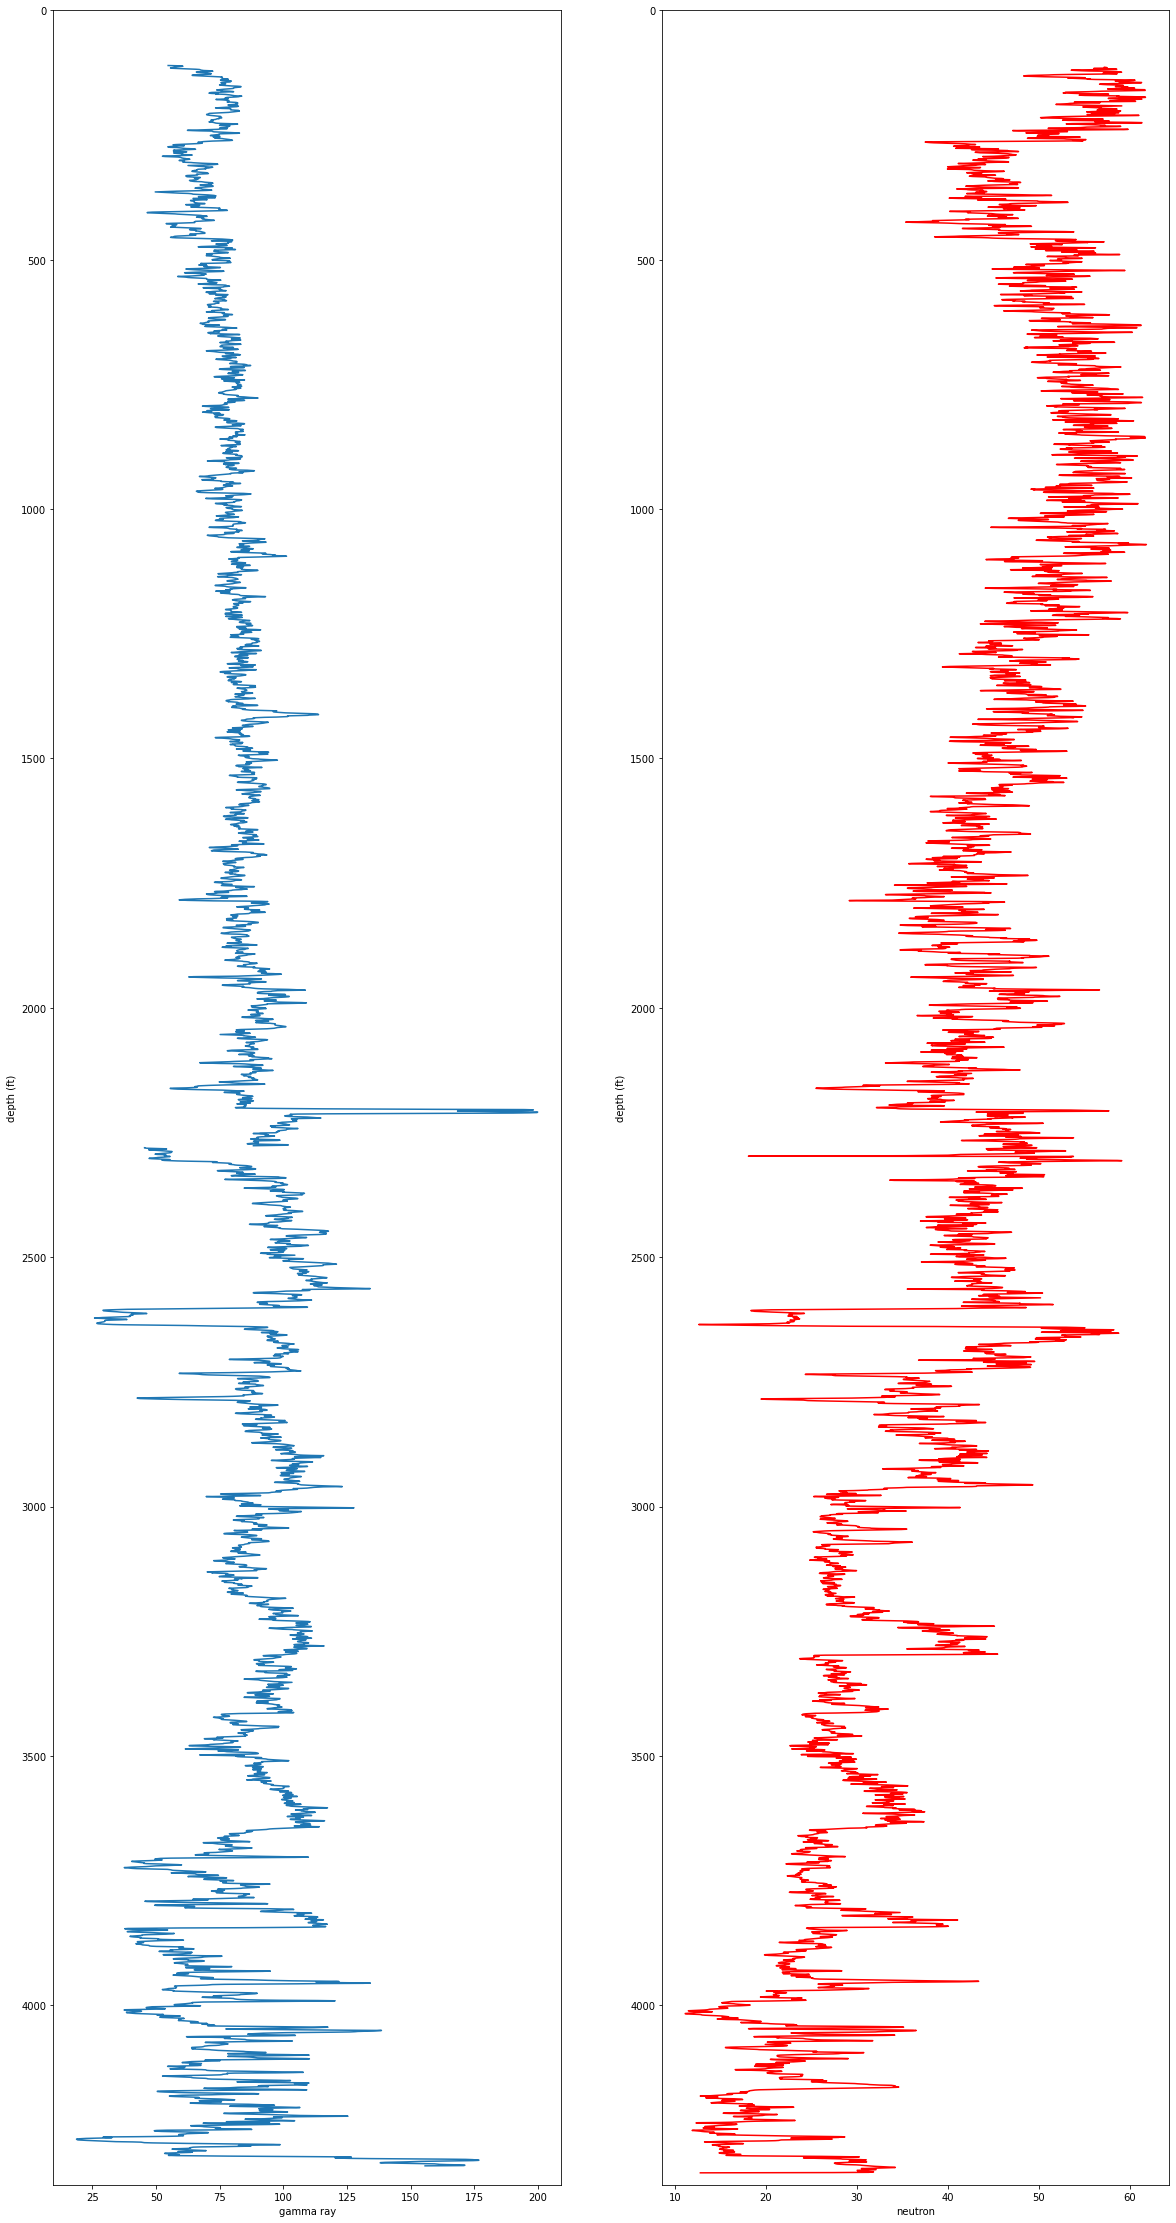

In [59]:
# get well plotting
## ax1 = gamma ray
## ax2 = neutron porosity
fig = plt.figure(figsize=(20, 40))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_xlabel("gamma ray")
ax2.set_xlabel("neutron")

ax1.set_ylabel("depth (ft)")
ax2.set_ylabel("depth (ft)")

ax1.plot(np.array(log_data["gr"]), np.array(log_data["m__depth.ft"]))
ax2.plot(np.array(log_data["nphi"]), np.array(log_data["m__depth.ft"]), color="red")

ax1.invert_yaxis()
ax2.invert_yaxis()

ax1.set_ylim(ymax=0, ymin=np.max(log_data["m__depth.ft"]))
ax2.set_ylim(ymax=0, ymin=np.max(log_data["m__depth.ft"]))
plt.show()

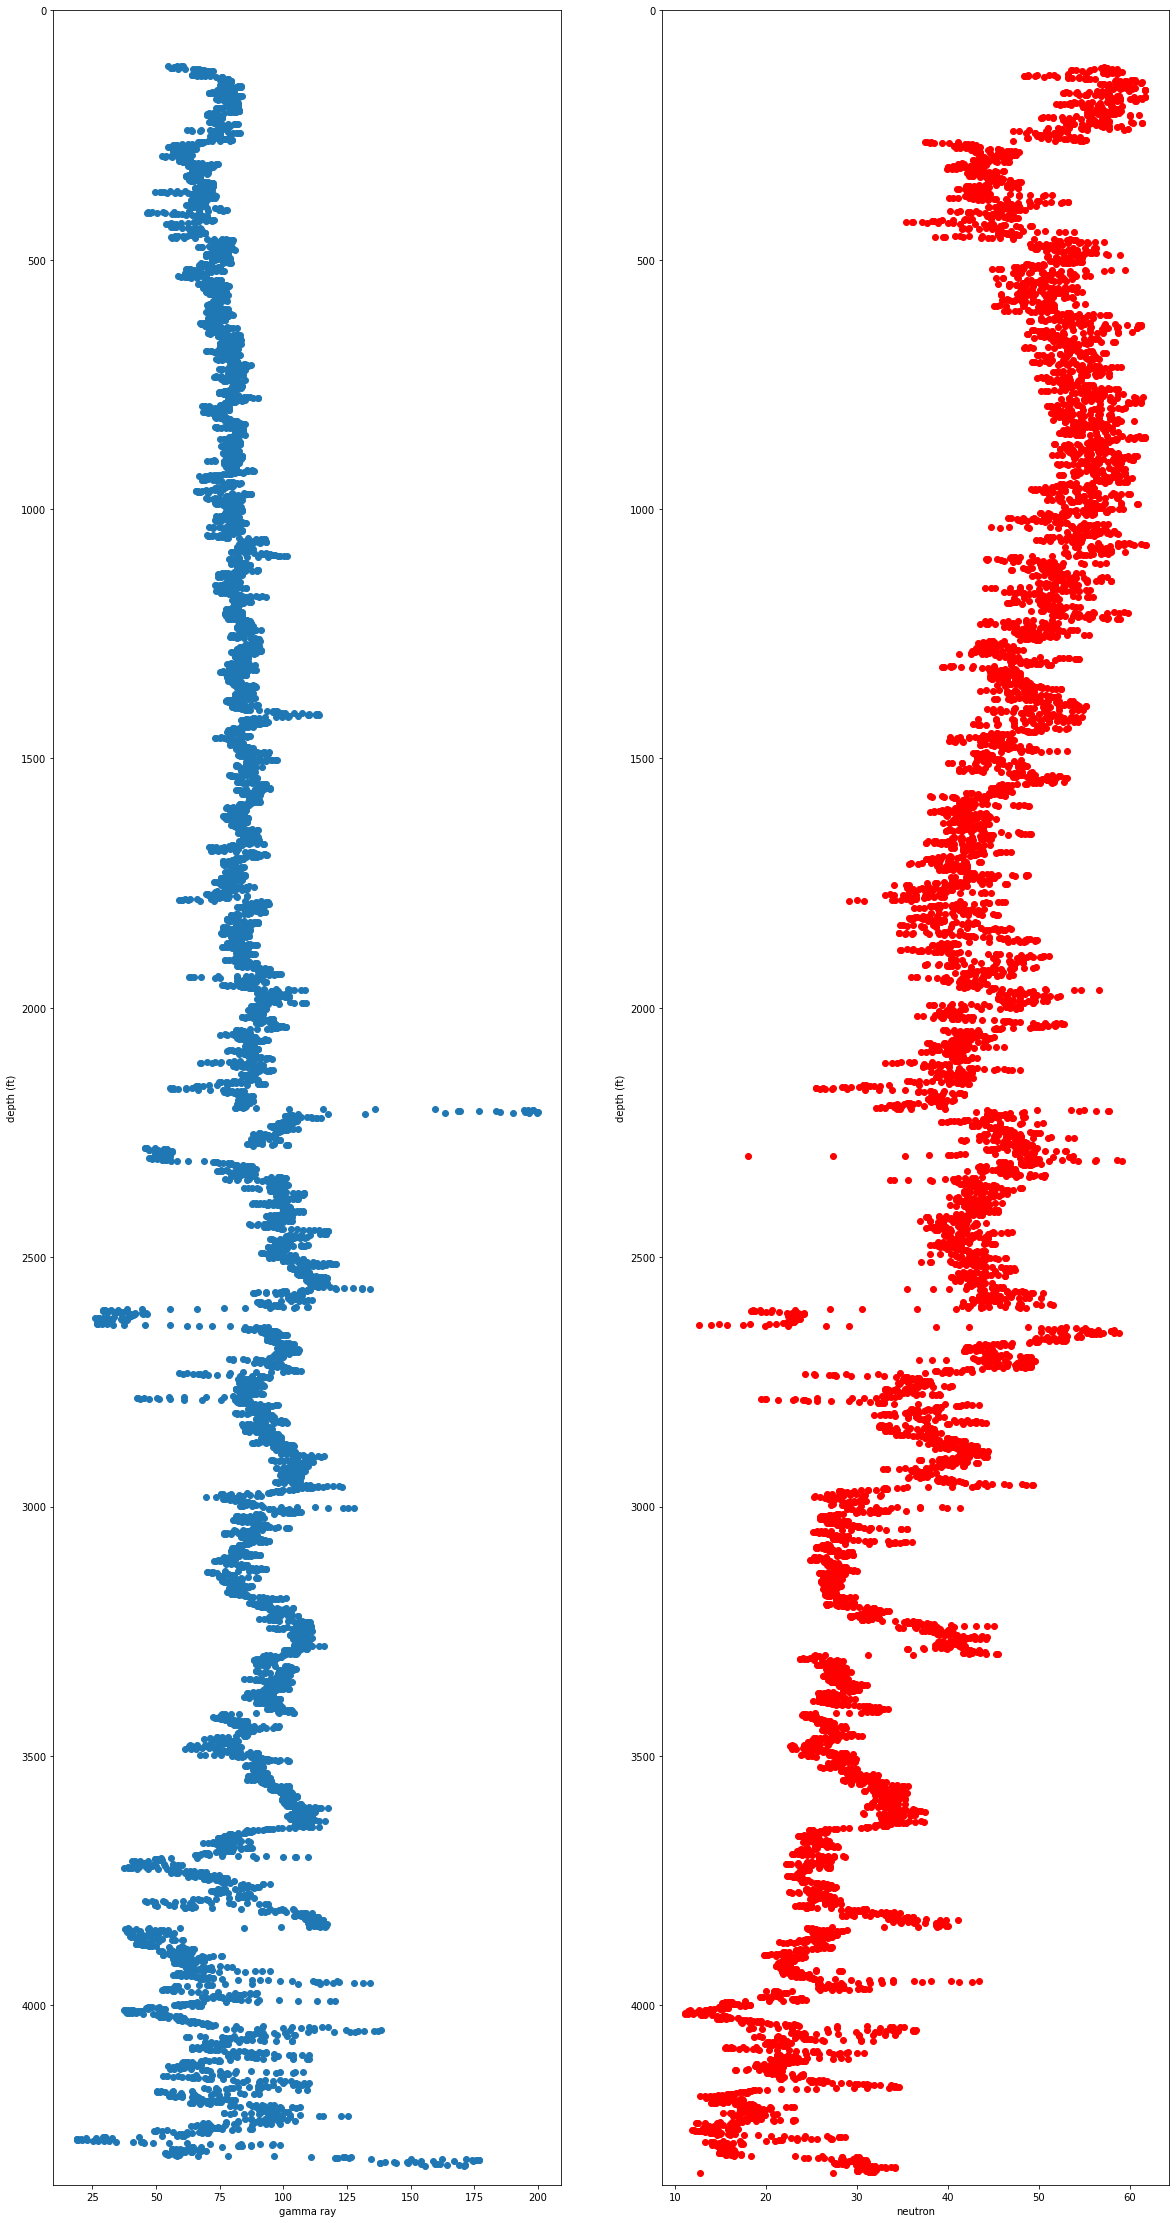

In [60]:
# get same plot
## in scatter format
fig = plt.figure(figsize=(20, 40))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_xlabel("gamma ray")
ax2.set_xlabel("neutron")

ax1.set_ylabel("depth (ft)")
ax2.set_ylabel("depth (ft)")

ax1.scatter(np.array(log_data["gr"]), np.array(log_data["m__depth.ft"]))
ax2.scatter(np.array(log_data["nphi"]), np.array(log_data["m__depth.ft"]), color="red")

ax1.invert_yaxis()
ax2.invert_yaxis()

ax1.set_ylim(ymax=0, ymin=np.max(log_data["m__depth.ft"]))
ax2.set_ylim(ymax=0, ymin=np.max(log_data["m__depth.ft"]))
plt.show()

In [61]:
help(WellLog)

Help on class WellLog in module las_converter:

class WellLog(builtins.object)
 |  Defines well log database with LAS file input.
 |   
 |    parameter input(s):
 |      - file (str)
 |        Specifies LAS file inputted for process well log data.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, file)
 |      Initiate well log instance
 |  
 |  get_data(self, section)
 |      Get the loaded well log data information
 |      
 |        parameter input(s):
 |          - section (str)
 |            Get the well log information based on section input
 |      
 |        output(s)
 |          - list of information based on input provided.
 |  
 |  get_description(self, section=None)
 |      Get the loaded well log data description
 |      
 |        parameter input(s):
 |          - section (str)
 |            Get the well log information based on section input
 |            Return list of sections input provided if section is not given
 |            Default value = None
 |      
 |   

In [62]:
# save file in json
log1.save_file("json")

Well log data saved as JSON.


In [63]:
# log1.get_description?

In [64]:
log1.save_file("csv")

Well log data saved as CSV.
